# Maze Solver using MCTS

This is part of the course project for [DA203](https://iken.iisc.ac.in/mtech-online/aiml-da203.html) done by
* Ganesh Halthota (ganeshhaltho@iisc.ac.in)
* Girish Naik (girishnaik@iisc.ac.in)
* Biswarup Das Sarma (biswarupdas@iisc.ac.in)
* Harsha Pamarthi Vardhan (harshapv@iisc.ac.in)

## Common Module Imports and Methods

In [ ]:
!pip install osmnx
!pip install ipython-autotime
%load_ext autotime

time: 11.8 ms (started: 2022-04-15 18:07:22 +00:00)


In [ ]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import random
import concurrent.futures
import time
import matplotlib as plt
import seaborn as sns
import pandas as pd

time: 1.94 s (started: 2022-04-15 18:07:22 +00:00)


In [ ]:
def plot_path(route, origin_point, destination_point):
    """
    Given a list of route points, origin
    and destination point, plots a path on a map

    Parameters
    ----------
    route: list of nodes in the route
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """

    # getting coordinates of the nodes
    long = []
    lat = []

    for i in route:
        point = G.nodes[i]
        long.append(point['x'])
        lat.append(point['y'])

    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))

    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))

    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))

    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)

    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                     mapbox = {
                         'center': {'lat': lat_center, 'lon': long_center},
                         'zoom': 15})

    fig.show()

time: 22.8 ms (started: 2022-04-15 18:07:24 +00:00)


## Exploration of OpenStreetMap Data

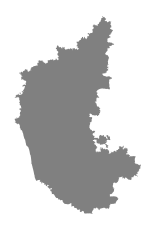

time: 450 ms (started: 2022-04-15 18:07:24 +00:00)


In [ ]:
# Download the map data of Karnantaka State
state = ox.geocode_to_gdf('Karnataka, India')
ax = ox.project_gdf(state).plot(fc='gray', ec='none')
_ = ax.axis('off')

In [ ]:
state

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((74.05439 14.81653, 74.05463 14...",18.476649,11.594559,78.588083,74.054391,282627108,relation,2019939,14.52039,75.722352,"Karnataka, India",boundary,administrative,0.896806


time: 153 ms (started: 2022-04-15 18:07:24 +00:00)


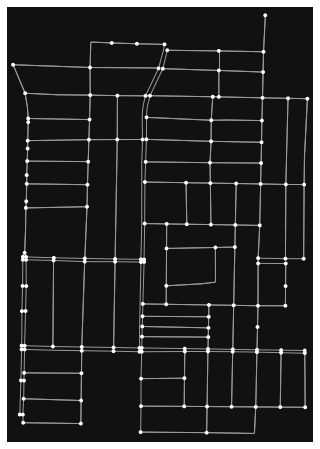

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

time: 8.45 s (started: 2022-04-15 18:07:24 +00:00)


In [ ]:
# Defining the map boundaries for par of Jayanagar, Bengaluru
north, east, south, west = 12.9278,77.5890, 12.9200,77.5835

# Downloading the map as a graph object
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')

# Plotting the map graph
ox.plot_graph(G)

In [ ]:
# Displaying the Structure of node
list(G.nodes(data=True))[2]

(249075449, {'street_count': 3, 'x': 77.5859466, 'y': 12.923979})

time: 7.6 ms (started: 2022-04-15 18:07:33 +00:00)


In [ ]:
# Displaying the Structure of Edge without curve
list(G.edges(data=True))[10][1]

249075521

time: 5.68 ms (started: 2022-04-15 18:07:33 +00:00)


In [ ]:
# Displaying the Structure of Edge with curve
list(G.edges(data=True))[10][2]

{'geometry': <shapely.geometry.linestring.LineString at 0x7f972c8bfdd0>,
 'highway': 'secondary',
 'length': 131.235,
 'name': '33rd Cross Road',
 'oneway': False,
 'osmid': 27673056}

time: 11.8 ms (started: 2022-04-15 18:07:33 +00:00)


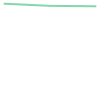

time: 20.9 ms (started: 2022-04-15 18:07:33 +00:00)


In [ ]:
# Display the curve of an Edge
list(G.edges(data=True))[10][2]['geometry']

## Shortest Path Search

### Defining the Starting and Ending Nodes

In [ ]:
# define origin and destination locations
origin_point = (12.9256,77.5861)
destination_point = (12.9234,77.5859)

# get the nearest nodes to the locations
origin_node = ox.distance.nearest_nodes(G, X=origin_point[1], Y=origin_point[0])
destination_node = ox.distance.nearest_nodes(G, X=destination_point[1], Y=destination_point[0])

# printing the closest node id to origin and destination points
origin_node, destination_node

(303924280, 7287518205)

time: 50.1 ms (started: 2022-04-15 18:07:33 +00:00)


### Shortest Path using Bellman-Ford Algorithm

In [ ]:
start_time = time.time()
route = nx.bellman_ford_path(G, origin_node, destination_node, weight = 'length')
time_taken = time.time() - start_time
print(f"Time taken = {time_taken}s")
print(f"route length = {len(route)}")
plot_path(route, origin_point, destination_point)

Time taken = 0.014019012451171875s
route length = 8


time: 385 ms (started: 2022-04-15 18:07:33 +00:00)


### Shortest Path using A* Algorithm

In [ ]:
start_time = time.time()
route = nx.astar_path(G, origin_node, destination_node, weight = 'length')
time_taken = time.time() - start_time
print(f"Time taken = {time_taken}s")
print(f"route length = {len(route)}")
plot_path(route, origin_point, destination_point)

Time taken = 0.00218963623046875s
route length = 8


time: 49.8 ms (started: 2022-04-15 18:07:33 +00:00)


### Shortest Path using Dijkstra's Algorithm

In [ ]:
start_time = time.time()
route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
time_taken = time.time() - start_time
print(f"Time taken = {time_taken}s")
print(f"route length = {len(route)}")
plot_path(route, origin_point, destination_point)

Time taken = 0.0005452632904052734s
route length = 8


time: 53.3 ms (started: 2022-04-15 18:07:34 +00:00)


### Shortest Path using Monte-Carlo Tree Search

In [ ]:
def mcts_serial(input_dict):
    """
    Given a dictionary of directed graph, origin point,
    destination point and maximum iterations, perform
    Monte Carlo Tree Search on the provided Graph

    Parameters
    ----------
    input_dict  : dictionary with fields of graph, origin_node, destination_node, max_iters

    Returns
    -------
    route       : list of nodes that are visited in this route
    distance    : distance covered via edges for traversing the nodes in 'route'
    """
    graph = input_dict['graph']
    origin_node = input_dict['origin_node']
    destination_node = input_dict['destination_node']
    max_iters = input_dict['max_iters']
    curr_node = origin_node
    iter = 0
    distance = 0
    route = [curr_node]

    while((curr_node != destination_node) or (iter < max_iters)):
        choices = [i for i in graph.neighbors(curr_node)]
        if len(choices) == 0:
            # we are at a dead end of the directed graph
            # and cannot move to another node
            break
        next_node = choices[random.randint(0, len(choices) - 1)]
        distance += graph.get_edge_data(curr_node, next_node)[0]['length']
        route.append(next_node)
        if (next_node == destination_node):
            break
        curr_node = next_node
        iter += 1

    return (route, distance)

time: 34.5 ms (started: 2022-04-15 18:07:34 +00:00)


In [ ]:
# Execute MCTS once
input_dict = {
    'graph': G,
    'origin_node': origin_node,
    'destination_node': destination_node,
    'max_iters': 1000
}
(route, dist) = mcts_serial(input_dict)
print(dist)
plot_path(route, origin_point, destination_point)

4650.612000000002


time: 93.2 ms (started: 2022-04-15 18:07:34 +00:00)


In [ ]:
def mcts_parallel(parallel_threads=1000):
    """
    Given number of parallel threads, perform MCTS for
    specified number of threads

    Parameters
    ----------
    parallel_threads : number of parallels threads to be executed

    Returns
    -------
    time_taken      : time taken for this method to execute
    min_dist        : minimum distance for the minimum distance route found
    min_dist_route  : list of nodes in the minimum distance route
    """
    start_time = time.time()

    input_dict = {
        'graph': G,
        'origin_node': origin_node,
        'destination_node': destination_node,
        'max_iters': 1000
    }

    # Run multiple mcts_serial in parallel and get their results
    futures_list = []
    results = []
    input_iter = [input_dict for i in range(0, parallel_threads)]

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for inp in input_iter:
            futures = executor.submit(mcts_serial, inp)
            futures_list.append(futures)

        for future in futures_list:
            try:
                result = future.result()
                results.append(result)
            except Exception:
                results.append(None)

    # parse the results to find the best route
    min_dist_route = []
    min_dist = results[0][1]

    for rt in results:
        # all mcts paths do not reach the destination node
        if rt[0][-1] != destination_node:
            continue
        if rt[1] < min_dist:
            min_dist_route = rt[0]
            min_dist = rt[1]
    time_taken = time.time() - start_time
    return (time_taken, min_dist, min_dist_route)

time: 79.7 ms (started: 2022-04-15 18:07:34 +00:00)


In [ ]:
# Define the variables for storing data
mcts_time_list = []
mcts_dist_list = []
mcts_route_list = []

time: 9.07 ms (started: 2022-04-15 18:07:34 +00:00)


In [ ]:
parallel_threads = [10, 100, 500, 1000, 5000, 10000, 15000, 20000, 30000]

time: 1.47 ms (started: 2022-04-15 18:07:34 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[0])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 71.5 ms (started: 2022-04-15 18:08:07 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[1])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 138 ms (started: 2022-04-15 18:08:13 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[2])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 563 ms (started: 2022-04-15 18:08:18 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[3])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 1.06 s (started: 2022-04-15 18:08:23 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[4])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 5.17 s (started: 2022-04-15 18:08:24 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[5])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 10.5 s (started: 2022-04-15 18:08:29 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[6])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 15.6 s (started: 2022-04-15 18:08:40 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[7])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 20.9 s (started: 2022-04-15 18:12:04 +00:00)


In [ ]:
time_taken, min_dist, min_dist_route = mcts_parallel(parallel_threads=parallel_threads[8])
mcts_time_list.append(time_taken)
mcts_dist_list.append(min_dist)
mcts_route_list.append(min_dist_route)
plot_path(min_dist_route, origin_point, destination_point)

time: 32.4 s (started: 2022-04-15 18:12:25 +00:00)


## Plotting the results

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

time: 12.9 ms (started: 2022-04-15 18:16:25 +00:00)


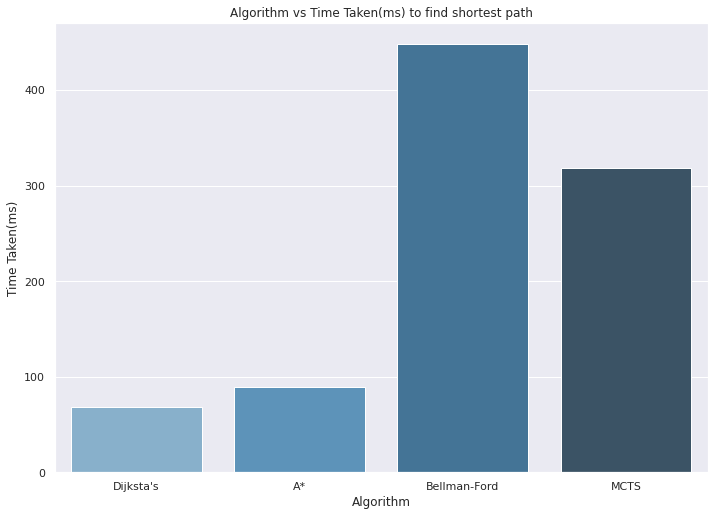

time: 739 ms (started: 2022-04-15 18:16:26 +00:00)


In [ ]:
vals = [68.8, 89.4 , 448, 318]
labels = ['Dijksta\'s', 'A*', 'Bellman-Ford', 'MCTS']

df = pd.DataFrame(list(zip(labels, vals)), columns=['Algorithm', 'Time Taken(ms)'])

ax = sns.barplot(x="Algorithm", y="Time Taken(ms)", data=df, palette="Blues_d").set_title("Algorithm vs Time Taken(ms) to find shortest path")

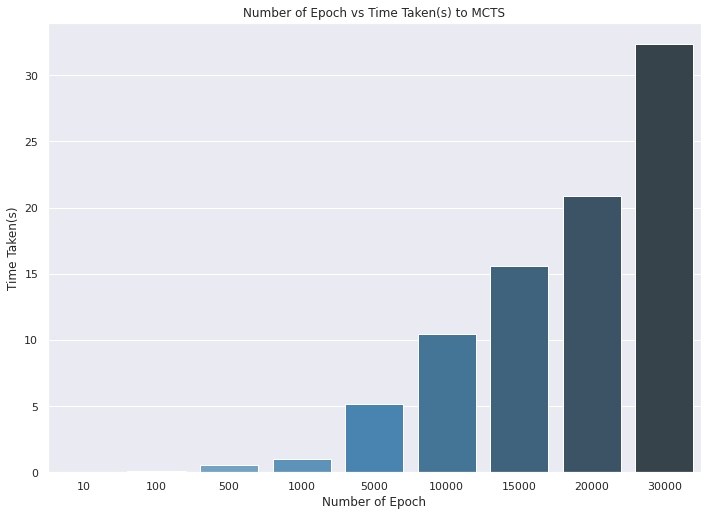

time: 440 ms (started: 2022-04-15 18:16:34 +00:00)


In [ ]:
vals = mcts_time_list
labels = [10, 100, 500, 1000, 5000, 10000, 15000, 20000, 30000]

df = pd.DataFrame(list(zip(labels, vals)), columns=['Number of Epoch', 'Time Taken(s)'])

ax = sns.barplot(x="Number of Epoch", y="Time Taken(s)", data=df, palette="Blues_d").set_title("Number of Epoch vs Time Taken(s) to MCTS")

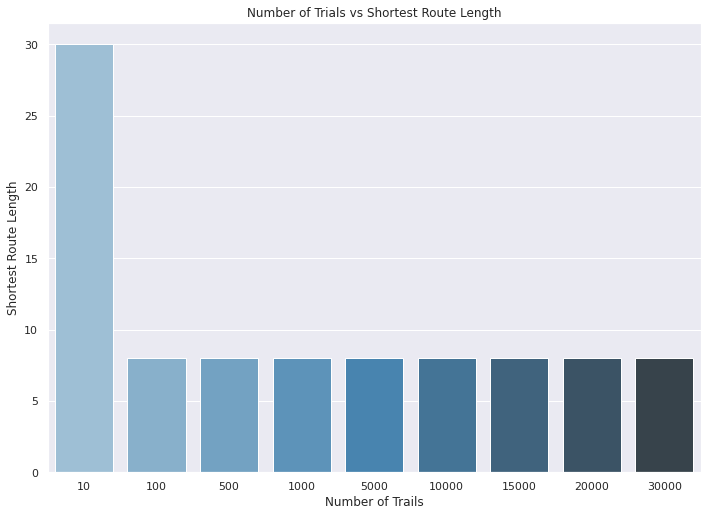

time: 461 ms (started: 2022-04-15 18:29:22 +00:00)


In [ ]:
vals = [len(route) for route in mcts_route_list]
labels = [10, 100, 500, 1000, 5000, 10000, 15000, 20000, 30000]

df = pd.DataFrame(list(zip(labels, vals)), columns=['Number of Trails', 'Shortest Route Length'])

ax = sns.barplot(x="Number of Trails", y="Shortest Route Length", data=df, palette="Blues_d").set_title("Number of Trials vs Shortest Route Length")